In [1]:
from tensorflow import keras

In [2]:
#Gathering the data(MNIST dataset)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data(path="mnist.npz")

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
#Checking the shape of both training and testing data of both input and output
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [4]:
#Normalization of data
x_train = x_train/255
x_test = x_test/255

In [5]:
#Building Neural Network Architecture
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
model = keras.Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(300,activation ='relu'))
model.add(Dropout(0.3))
model.add(Dense(50,activation ='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [6]:
#Compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [7]:
#fitting the model
history = model.fit(x_train,y_train,epochs=10,validation_split=0.1)

Epoch 1/20
1688/1688 [==============================] - 8s 4ms/step - loss: 0.5582 - accuracy: 0.8288 - val_loss: 0.1042 - val_accuracy: 0.9693
Epoch 2/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1715 - accuracy: 0.9488 - val_loss: 0.0829 - val_accuracy: 0.9758
Epoch 3/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1207 - accuracy: 0.9638 - val_loss: 0.0728 - val_accuracy: 0.9787
Epoch 4/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0988 - accuracy: 0.9696 - val_loss: 0.0731 - val_accuracy: 0.9782
Epoch 5/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0893 - accuracy: 0.9729 - val_loss: 0.0683 - val_accuracy: 0.9812
Epoch 6/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0748 - accuracy: 0.9768 - val_loss: 0.0677 - val_accuracy: 0.9808
Epoch 7/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0675 - accuracy: 0.9789 - val_loss: 0.0626 - val_accuracy:

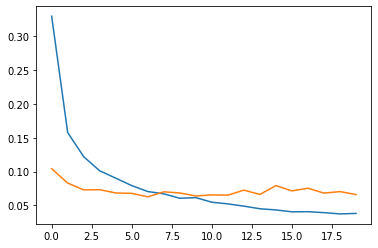

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [9]:
# Evaluation of test data
import numpy as np
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [10]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_pred,y_test)

array([[ 971,    0,    2,    0,    0,    2,    4,    0,    1,    2],
       [   1, 1127,    0,    0,    1,    0,    2,    3,    0,    3],
       [   1,    2, 1016,    3,    3,    0,    0,    7,    3,    0],
       [   0,    1,    5,  992,    0,    3,    0,    3,    6,    6],
       [   0,    0,    0,    0,  964,    2,    4,    1,    4,    8],
       [   1,    1,    0,    5,    0,  880,    3,    0,    1,    3],
       [   3,    2,    2,    0,    4,    3,  942,    0,    2,    0],
       [   0,    0,    3,    4,    3,    0,    1, 1007,    4,    6],
       [   2,    2,    4,    1,    2,    2,    2,    3,  950,    0],
       [   1,    0,    0,    5,    5,    0,    0,    4,    3,  981]])

In [11]:
accuracy_score(y_pred,y_test)*100

98.3

In [12]:
#Saving the model
model.save("MNIST_model.hdf5")